In [1]:
import os
import random
from glob import glob

import cv2
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
ori_img_paths = glob('data/carvana_image_masking_dataset/train/*.jpg')
ori_img_paths = sorted(ori_img_paths)
len(ori_img_paths)

5088

In [3]:
mask_paths = glob('data/carvana_image_masking_dataset/train_masks/*.gif')
mask_paths = sorted(mask_paths)
len(mask_paths)

5088

In [4]:
rand_idx = random.randint(0, len(ori_img_paths))
ori_img_path, mask_path = ori_img_paths[rand_idx], mask_paths[rand_idx]

ori_img = Image.open(ori_img_path).convert('RGB')
mask = Image.open(mask_path).convert('L')

np.array(ori_img).shape, np.array(mask).shape

((1280, 1918, 3), (1280, 1918))

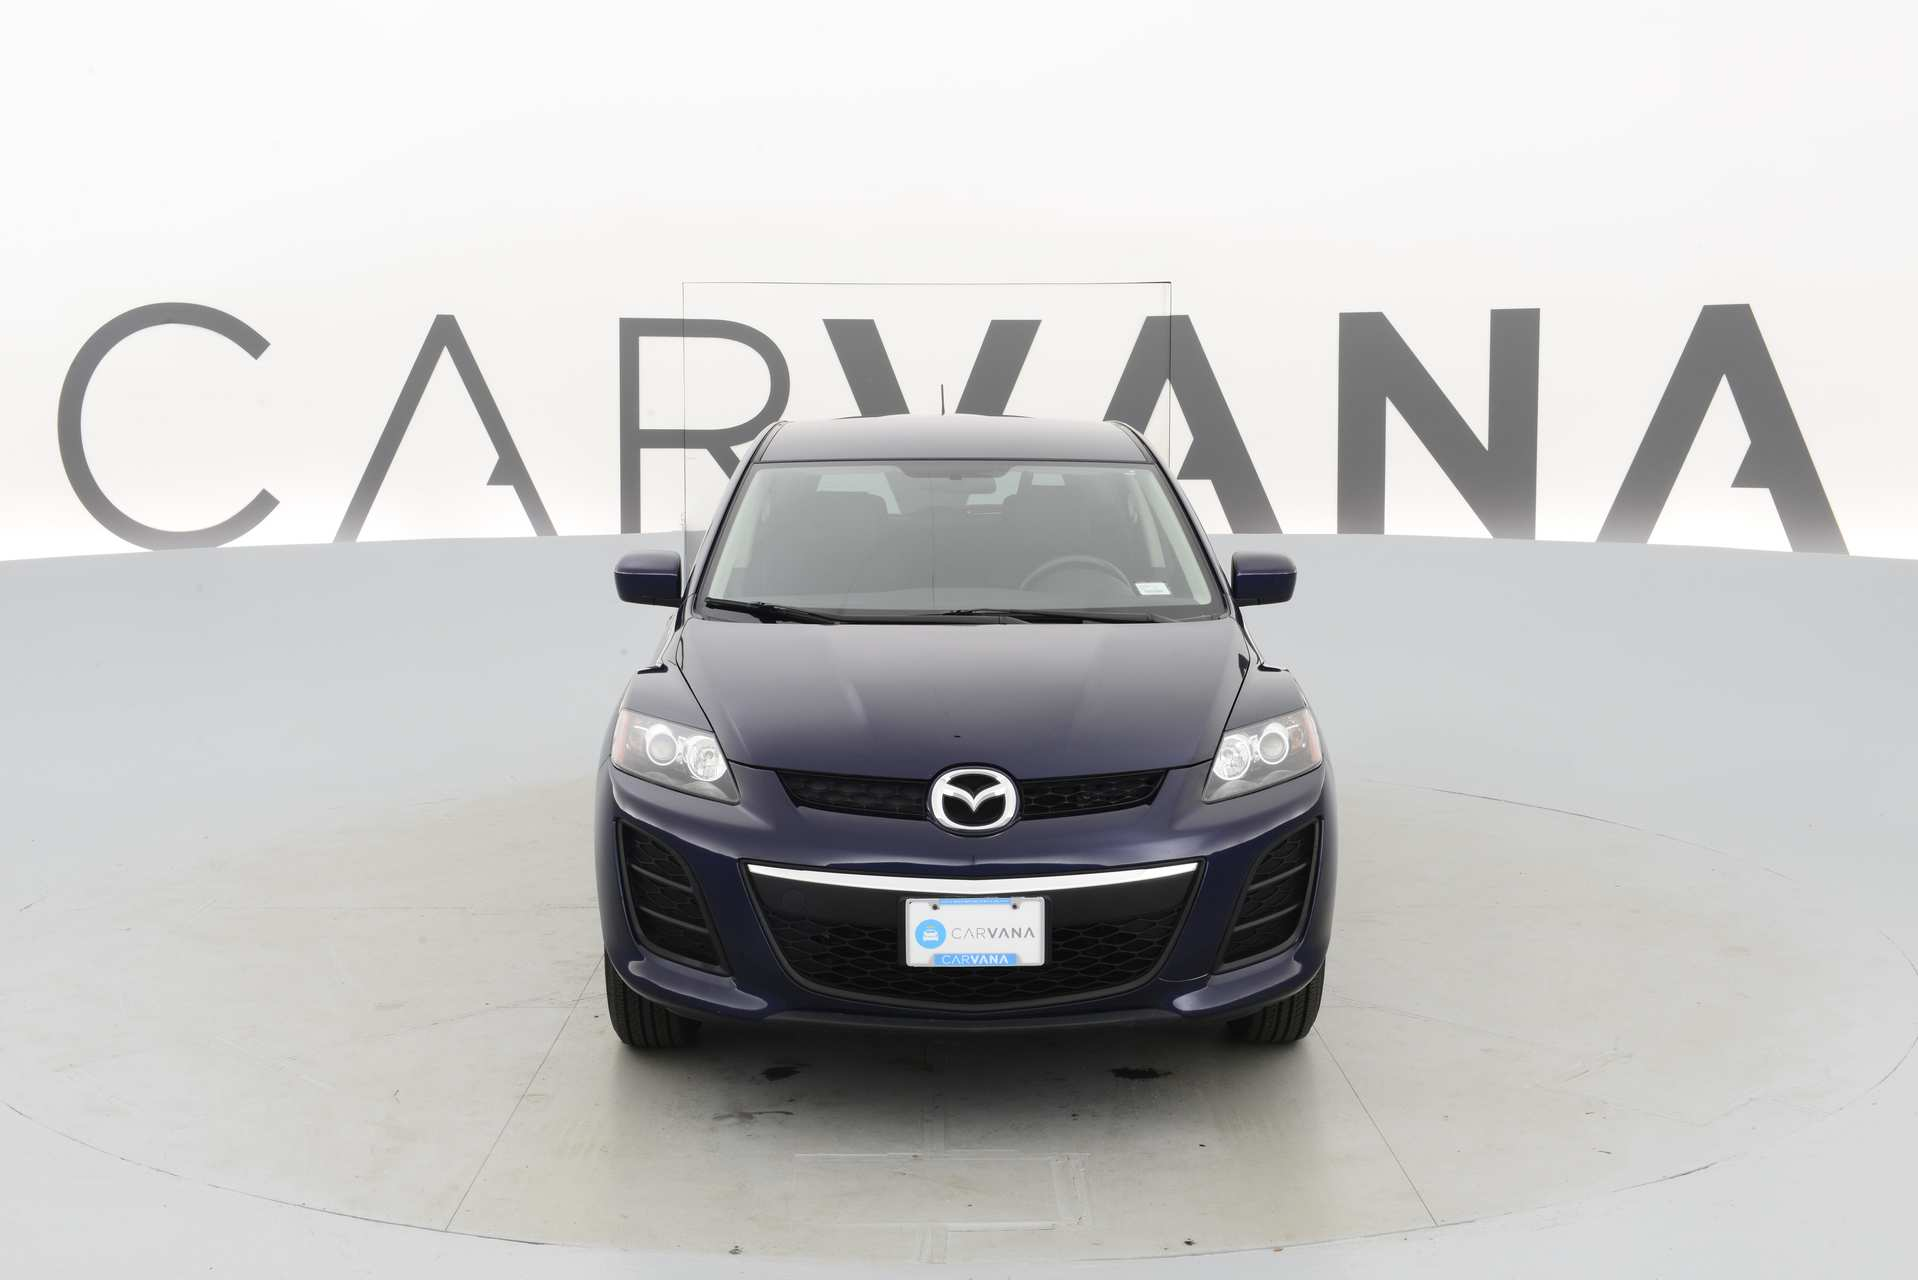

In [5]:
ori_img

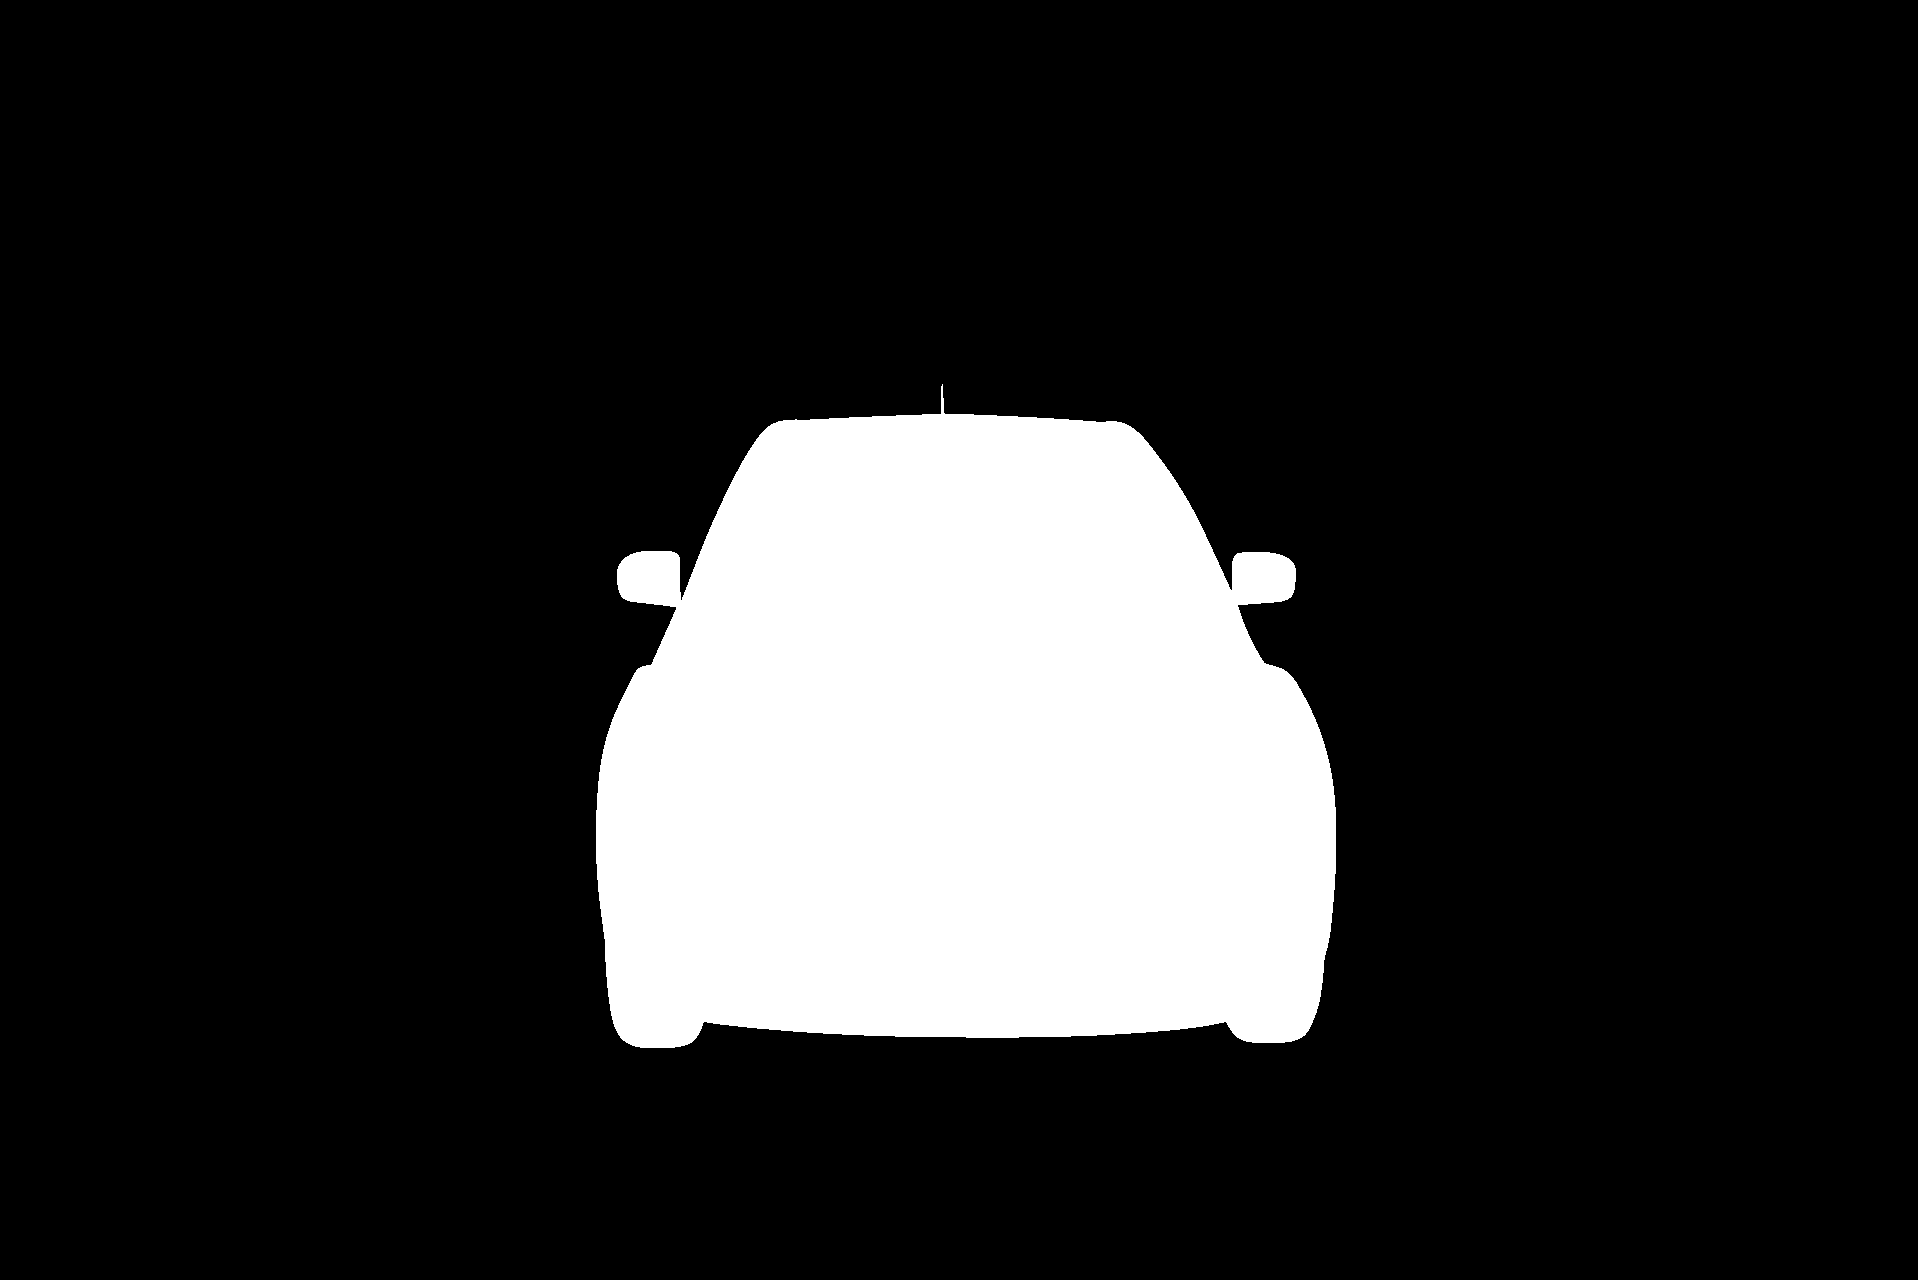

In [6]:
mask

In [7]:
np.array(mask).shape

(1280, 1918)

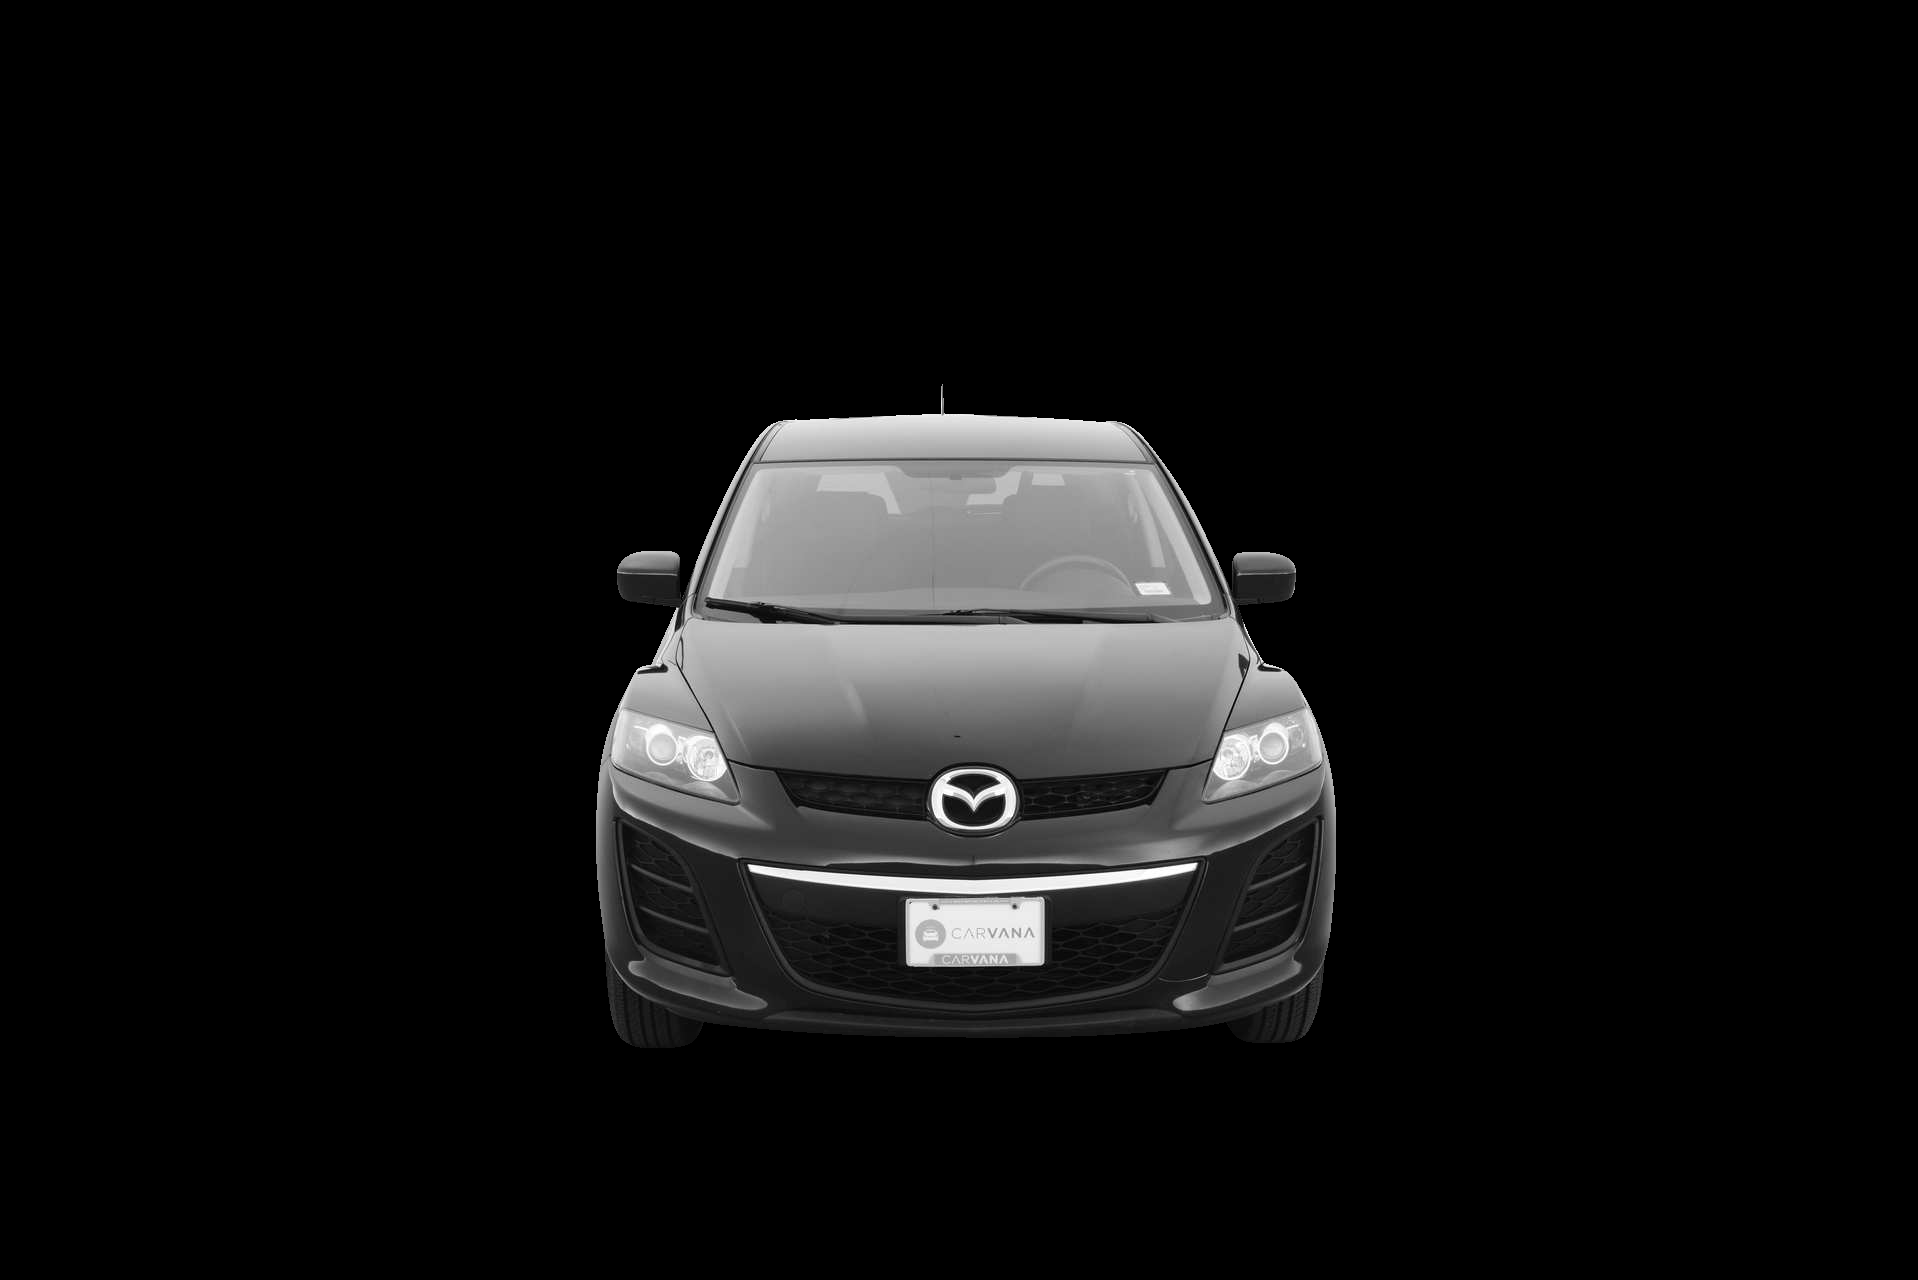

In [8]:
Image.composite(ori_img, mask, mask)

In [9]:
# Run-length encoding (RLE)
df = pd.read_csv('data/carvana_image_masking_dataset/train_masks.csv')
df

,img,rle_mask
0,00087a6bd4dc_01.jpg,879386 40 881253 141 883140 205 885009 17 8850...
1,00087a6bd4dc_02.jpg,873779 4 875695 7 877612 9 879528 12 881267 15...
2,00087a6bd4dc_03.jpg,864300 9 866217 13 868134 15 870051 16 871969 ...
3,00087a6bd4dc_04.jpg,879735 20 881650 26 883315 92 883564 30 885208...
4,00087a6bd4dc_05.jpg,883365 74 883638 28 885262 119 885550 34 88716...
...,...,...
5083,fff9b3a5373f_12.jpg,386005 13 387915 27 389829 34 391744 38 393660...
5084,fff9b3a5373f_13.jpg,393674 6 395585 19 397498 26 399412 32 401327 ...
5085,fff9b3a5373f_14.jpg,401397 9 403309 19 405223 26 405389 145 407138...
5086,fff9b3a5373f_15.jpg,407257 6 407393 89 409171 12 409263 179 411086...


In [10]:
rand_idx = random.randint(0, len(ori_img_paths))
img_df = df.iloc[rand_idx]
img_name, rle_mask = img_df.img, img_df.rle_mask
img_name, rle_mask

('69fba9e8f572_04.jpg',
 '603488 12 605403 17 607318 22 609234 25 611149 29 612894 78 613065 31 614785 129 614981 34 616684 170 616897 37 618587 205 618813 39 620492 233 620729 42 622398 291 624306 302 626215 311 628125 319 630035 328 631947 334 633858 341 635771 348 637684 358 639597 369 641510 380 643424 389 645338 398 647252 407 649166 416 651080 424 652994 433 654908 441 656823 448 658737 456 660652 463 662567 470 664482 477 666397 483 668312 490 670227 497 672142 503 674057 510 675972 516 677887 522 679802 529 681718 534 683633 540 685549 545 687464 551 689380 556 691295 562 693211 567 695126 573 697042 577 698958 582 700873 588 702789 593 704705 597 706620 603 708536 607 710452 612 712368 616 714284 621 716200 625 718115 631 720031 635 721947 639 723864 643 725780 647 727696 651 729612 655 731528 660 733444 664 735360 668 737277 671 739193 676 741109 680 743025 684 744941 688 746857 693 748774 696 750690 700 752606 704 754522 709 756439 712 758355 716 760271 720 762187 724 764104

In [11]:
ROOT = 'data/carvana_image_masking_dataset/train/'

In [12]:
def rle_decode(img_name, rle_mask_str):
    s = rle_mask_str.split()
    starts = np.array(s[0:][::2], dtype=int) - 1
    lengths = np.array(s[1:][::2], dtype=int)
    ends = starts + lengths

    img = cv2.imread(os.path.join(ROOT, img_name))
    mask = np.zeros(img.shape[0] * img.shape[1], dtype=np.uint8)

    for lo, hi in zip(starts, ends):
        mask[lo:hi] = 1
    return img, np.reshape(mask, (img.shape[0], img.shape[1]))

In [13]:
img, mask = rle_decode(img_name, rle_mask)
img.shape, mask.shape

((1280, 1918, 3), (1280, 1918))

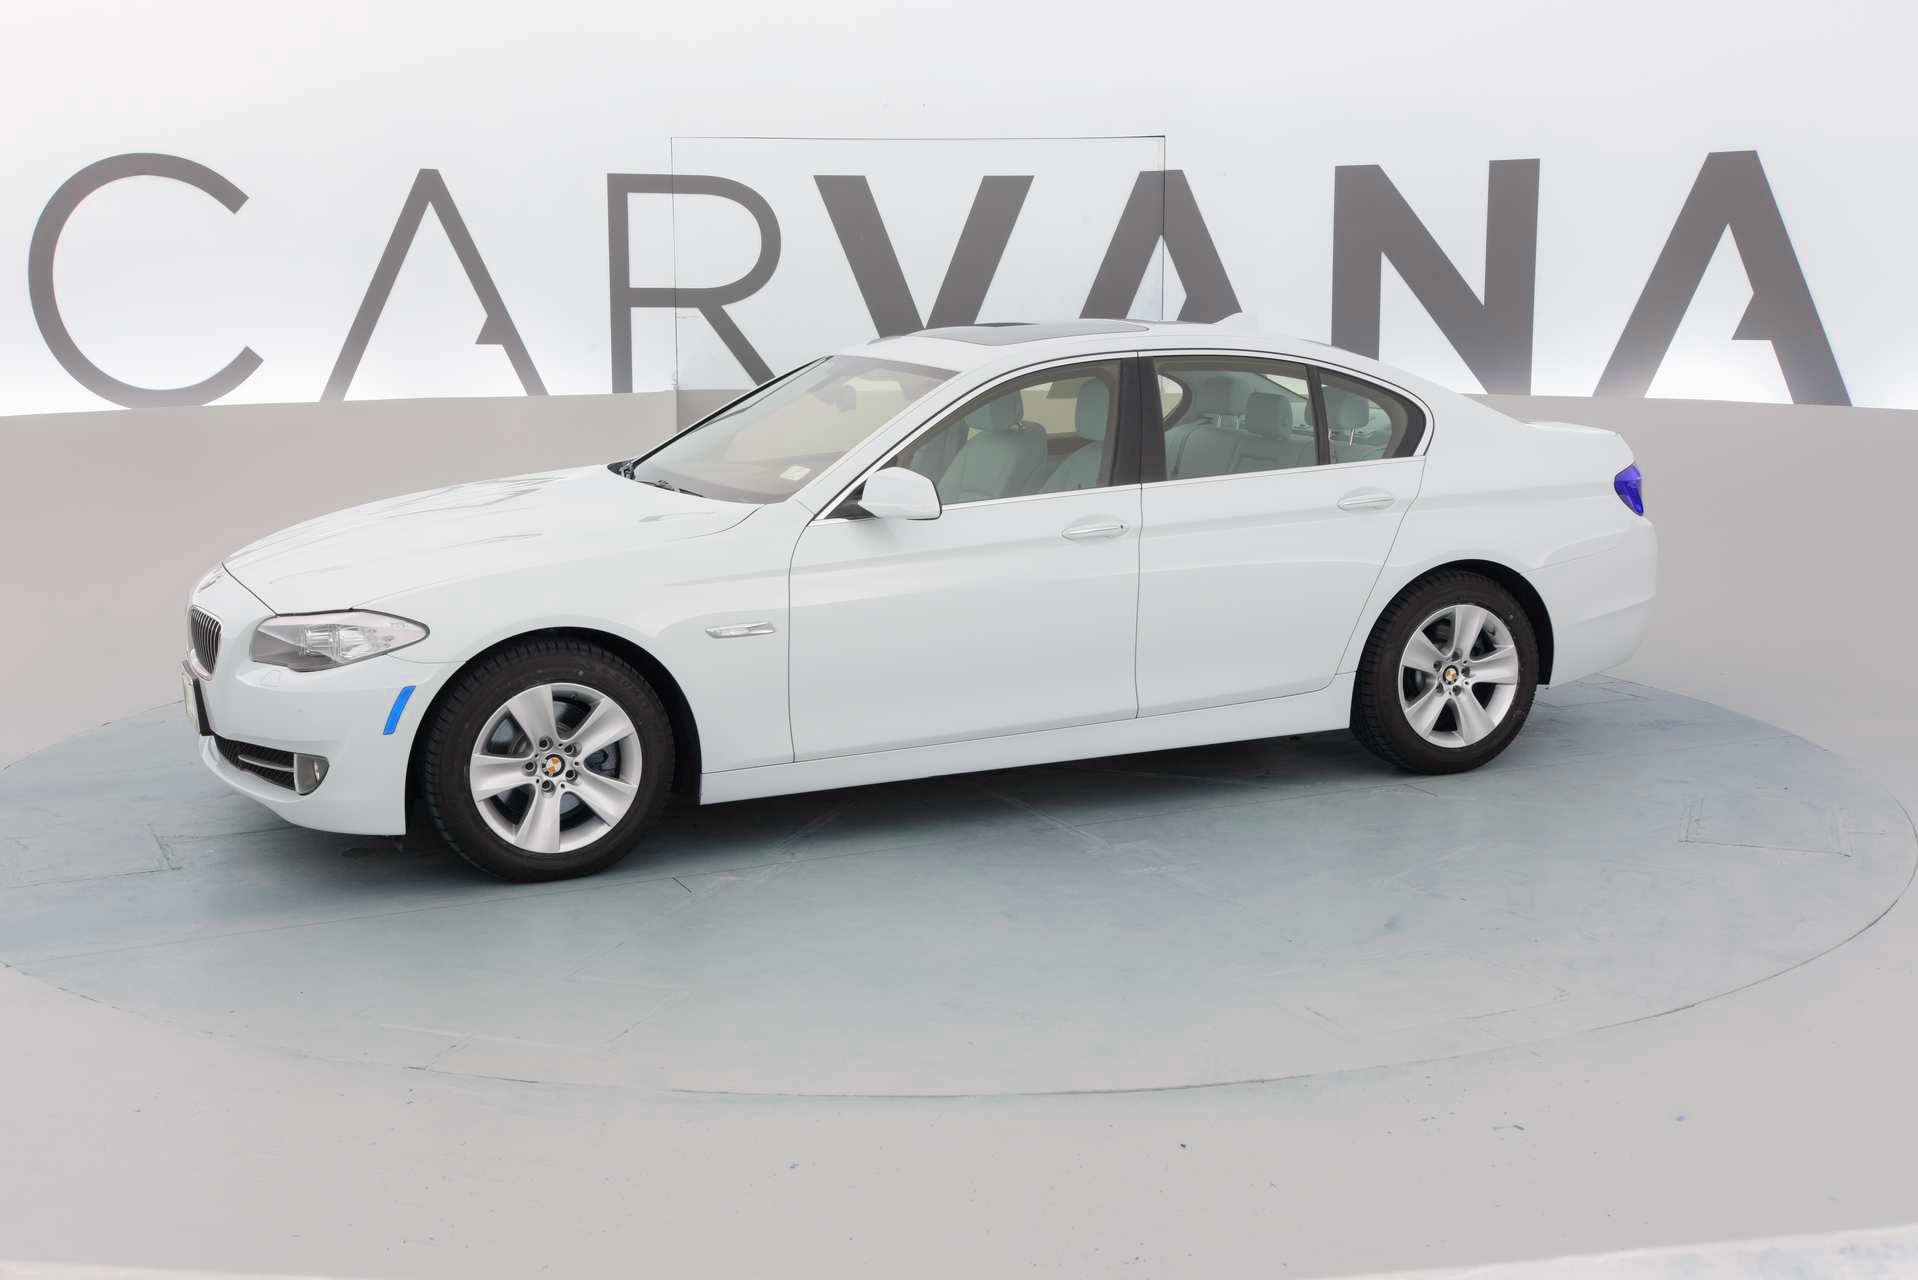

In [14]:
Image.fromarray(img)

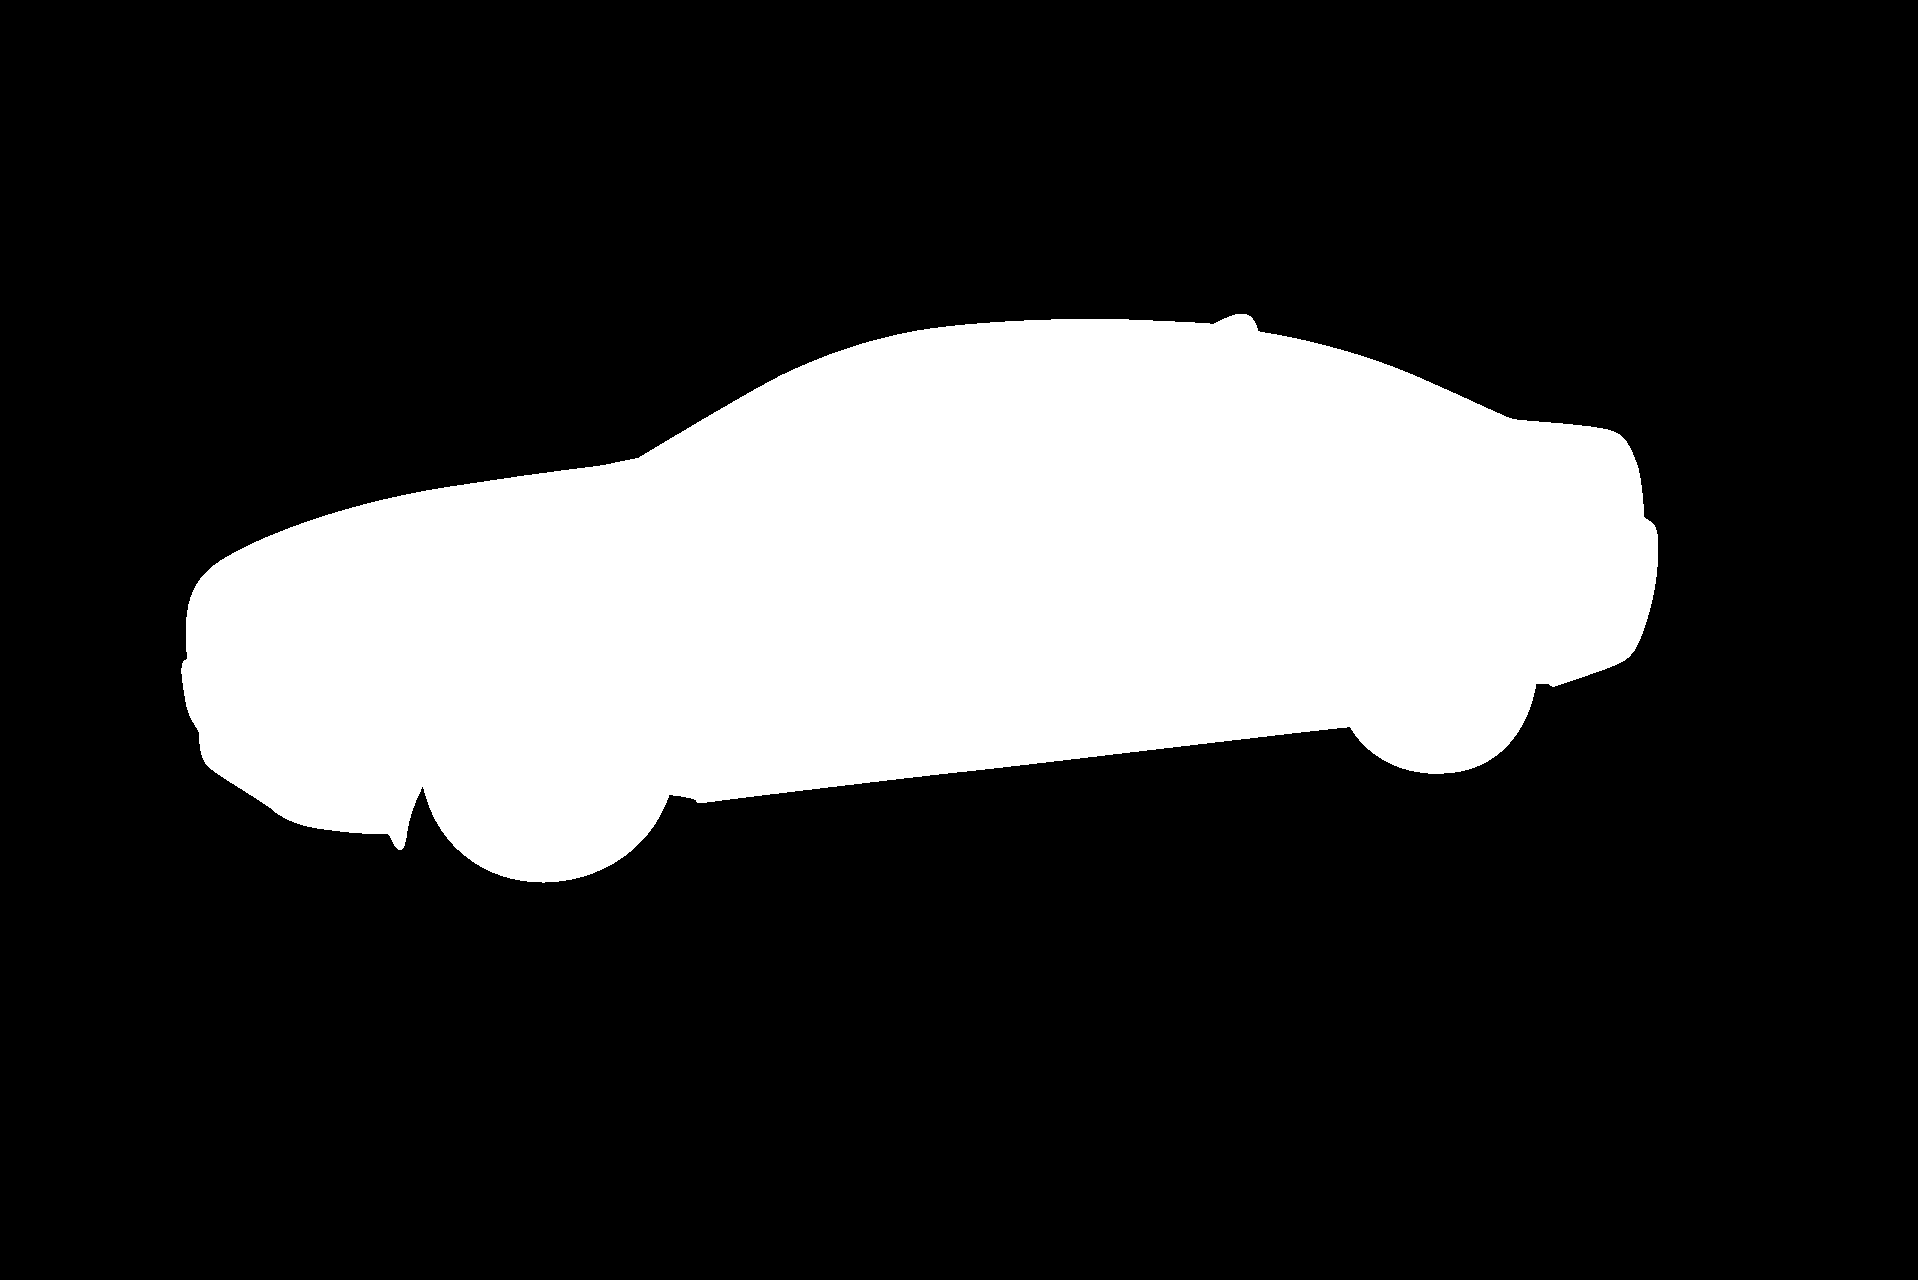

In [15]:
Image.fromarray(mask * 255)